<img align=right src="https://github.com/INMAS-Math/Workshop-V-02/blob/main/images/inmas.png?raw=1" width=130x />

# Notebook 04b - Logistic Regression - Supplement

Material covered in this notebook:

This notebook follows along the notes [here](notes/4_LogisticRegression.pdf)


### Prerequisite
Notebook 04a

------------------------------------

In [12]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [13]:
# Read in Data
uci_adult_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
     sep = ",",
     header = None,
     na_values = ['NA','?']
  )

# Add all column names
uci_adult_df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

display(uci_adult_df)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Splitting Data

The standard practice when modeling is to split a single data set into two:

- **Training**: Data that should be used to train the model.
- **Testing**: Data that should be used to evaluate the predictions made by the trained model.

Usually, the percentage is about an 80/20% split with 80% going to training and 20% going to testing.

In [14]:
# Load train_test_split function in the model_selection module for sklearn
from sklearn.model_selection import train_test_split

# Split the data with 20% in testing and 80% in training.
train, test = train_test_split(uci_adult_df, test_size=0.2)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26048 entries, 28845 to 8301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            26048 non-null  int64 
 1   WorkClass      26048 non-null  object
 2   fnlwgt         26048 non-null  int64 
 3   Education      26048 non-null  object
 4   EducationNum   26048 non-null  int64 
 5   MaritalStatus  26048 non-null  object
 6   Occupation     26048 non-null  object
 7   Relationship   26048 non-null  object
 8   Race           26048 non-null  object
 9   Gender         26048 non-null  object
 10  CapitalGain    26048 non-null  int64 
 11  CapitalLoss    26048 non-null  int64 
 12  HoursPerWeek   26048 non-null  int64 
 13  NativeCountry  26048 non-null  object
 14  Income         26048 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 6513 entries, 19255 to 12170
Data columns (total 15 columns):
 #   

In [15]:
## logistic regression expects 0s and 1s as the response variable
tempVec = pd.get_dummies(train['Income'])
tempVec

,<=50K,>50K
28845,True,False
3652,False,True
19285,True,False
28226,True,False
6535,False,True
...,...,...
31634,True,False
18992,True,False
19672,True,False
28332,True,False


In [16]:
train['Income_Binary'] = tempVec[' >50K'].astype(int)

tempVec = pd.get_dummies(test['Income'])

test['Income_Binary']  = tempVec[' >50K'].astype(int)
test

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Binary
19255,22,?,117618,Bachelors,13,Never-married,?,Not-in-family,White,Male,0,0,25,United-States,<=50K,0
13795,41,Self-emp-not-inc,155767,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K,0
5369,30,Private,1184622,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,35,United-States,<=50K,0
17934,39,Local-gov,327164,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K,0
182,30,Private,633742,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,45,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15470,42,Private,175943,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Wife,White,Female,7298,0,35,United-States,>50K,1
29064,25,Private,288519,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
32334,24,Private,176580,5th-6th,3,Married-spouse-absent,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K,0
16060,55,Local-gov,135439,Bachelors,13,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,48,United-States,<=50K,0


Let's fit a model on the training data and see how well it does on the testing data.

In [17]:

# Specify the desired model of y regressing onto x
model_formula = smf.logit('Income_Binary ~ Age + Race + Gender + HoursPerWeek', data = train)

# Fit the model to the data
results = model_formula.fit()

results.params

Optimization terminated successfully.
         Current function value: 0.481164
         Iterations 6


,0
Intercept,-5.978941
Race[T. Asian-Pac-Islander],0.877204
Race[T. Black],0.189132
Race[T. Other],-0.093575
Race[T. White],0.750092
Gender[T. Male],0.986374
Age,0.041573
HoursPerWeek,0.040356


In [18]:
## Test accuracy
pred = results.predict(test)
predV = results.predict(test)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
test_acc = (test['Income_Binary'] == pred).mean()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(test_acc))

Accuracy of logistic regression classifier on test set: 0.76


Let's break that down to decide in what ways we are wrong and right.

In [19]:
from sklearn.metrics import confusion_matrix       ## logistic regression report packages
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Confusion matrix
confusion_matrix = confusion_matrix(test['Income_Binary'], pred)
print(confusion_matrix)

[[4692  222]
 [1366  233]]


The top left value means that the true value is 1 and we correctly predicted a 1 (true positive). The top right value means that the true value is 1 and we incorrectly predicted a 0 (false negative). The bottom left value means that the true value is 0 and we incorrectly predicted a 1 (false positive). The bottom right value means that the true value is 0 and we correctly predicted a 0 (true negative).

All of this has assumed that 0.5 is the appropriate cutoff value to turn predicted probabilities into binary predictions. What if we change this cutoff value? The ROC curve shows how well the model does under different cutoff values. Informally, we want the area under the curve to be large, so we want the curve to be as close to the upper left corner as possible. Read more about how to interpret this type of curve [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).



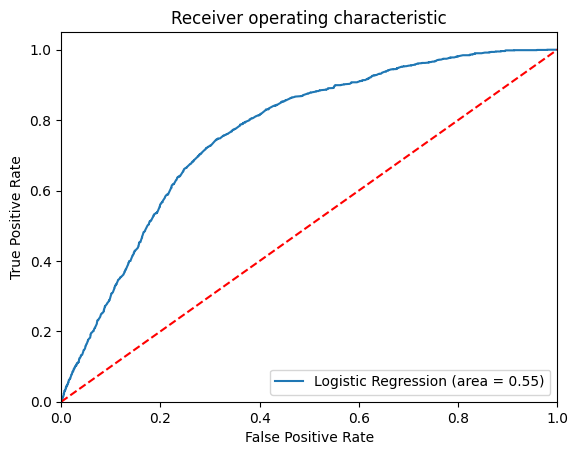

In [20]:
# ROC curve
logit_roc_auc = roc_auc_score(test['Income_Binary'], pred)
fpr, tpr, thresholds = roc_curve(test['Income_Binary'], predV)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Your Turn

Fit your own logistic regression model choosing a different binary response. Remember you will need to convert the categorical variable into a 0/1 variable before proceeding. Be sure to evaluate the fit of the model using a test dataset that the model has *not* been trained. on.